### ***Klasifikasi Kupu-Kupu dan Ngengat Menggunakan Metode Covolutional Neural Network (CNN) Efficientnet-B0***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import modul
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Activation, add, Add, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras import Model
from sklearn import metrics
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.0 MB/s eta 0:00:00
time: 282 µs (started: 2023-05-22 17:54:24 +00:00)


In [ ]:
#pengaturan parameter pada model ini, meliputi
batch_size = 64 #jumlah data pada setiap iterasi training
IMG_WIDTH = 224 #ukuran gambar yang akan digunakan
IMG_HEIGHT = 224
CHANNELS = 3 #jumlah channel pada gambar, RGB
CLASSES = 25 #jumlah kelas pada data
train_dir = '/content/drive/MyDrive/AI/Butterfly_Moths_25_Updated/train'
validation_dir = '/content/drive/MyDrive/AI/Butterfly_Moths_25_Updated/test'

time: 477 µs (started: 2023-05-22 17:54:24 +00:00)


In [ ]:
#data augmentasi pada data training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    fill_mode='constant',
    cval=0xCC,
    horizontal_flip=True,
    vertical_flip=True,
    channel_shift_range=100
    )

time: 309 µs (started: 2023-05-22 17:54:24 +00:00)


In [ ]:
#load training data
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True
        )

Found 3140 images belonging to 25 classes.
time: 8.21 s (started: 2023-05-22 17:54:25 +00:00)


In [ ]:
#menampilkan class dari model
motives_dict = train_generator.class_indices
print(motives_dict)

{'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ARCIGERA FLOWER MOTH': 5, 'ATALA': 6, 'ATLAS MOTH': 7, 'BANDED ORANGE HELICONIAN': 8, 'BANDED PEACOCK': 9, 'BANDED TIGER MOTH': 10, 'BECKERS WHITE': 11, 'BIRD CHERRY ERMINE MOTH': 12, 'BLACK HAIRSTREAK': 13, 'BLUE MORPHO': 14, 'BLUE SPOTTED CROW': 15, 'BROOKES BIRDWING': 16, 'BROWN ARGUS': 17, 'BROWN SIPROETA': 18, 'CABBAGE WHITE': 19, 'CAIRNS BIRDWING': 20, 'CHALK HILL BLUE': 21, 'CHECQUERED SKIPPER': 22, 'CHESTNUT': 23, 'CINNABAR MOTH': 24}
time: 445 µs (started: 2023-05-22 17:54:33 +00:00)


In [ ]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

print(target_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ARCIGERA FLOWER MOTH', 'ATALA', 'ATLAS MOTH', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BANDED TIGER MOTH', 'BECKERS WHITE', 'BIRD CHERRY ERMINE MOTH', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROOKES BIRDWING', 'BROWN ARGUS', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHALK HILL BLUE', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CINNABAR MOTH']
time: 407 µs (started: 2023-05-22 17:54:33 +00:00)


In [ ]:
#data augmentasi selama fase validasi
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=90,
    fill_mode='constant',
    cval=0xCC,
    horizontal_flip=False,
    vertical_flip=False,
    channel_shift_range=100
    )

time: 297 µs (started: 2023-05-22 17:54:33 +00:00)


In [ ]:
#konfigurasi untuk membuat generator data uji
validation_generator = validation_datagen.flow_from_directory(
            validation_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=False
        )

Found 250 images belonging to 25 classes.
time: 3.68 s (started: 2023-05-22 17:54:33 +00:00)


In [ ]:
#arsitektur model EfficientNetB0
model_ENB0 = EfficientNetB0( #fungsi yang dipanggil untuk membangun arsitektur EfficientNetB0
            include_top=False, #Parameter ini digunakan untuk tidak menyertakan layer output pada arsitektur model
            weights='imagenet', #Parameter ini digunakan untuk menggunakan bobot pra-latih yang telah di-train pada ImageNet
            input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNELS)) #Parameter ini digunakan untuk menentukan ukuran input gambar pada model
model_ENB0.trainable = False #Parameter ini digunakan untuk mematikan pembelajaran pada layer-layer yang terdapat pada EfficientNetB0
model_ENB0.summary()

16705208/16705208 [==============================] - 2s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescal

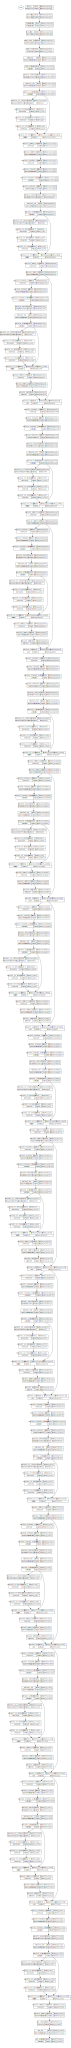

time: 1.21 s (started: 2023-05-22 17:54:45 +00:00)


In [ ]:
#menghasilkan visualisasi dari arsitektur model yang digunakan (EfficientNetB0) menggunakan library graphviz dan SVG
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot


SVG(model_to_dot(model_ENB0, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [ ]:
#pembuatan model dengan menggunakan Sequential API pada framework Keras
model = Sequential()
model.add(model_ENB0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.01))
model.add(Dense(CLASSES,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 25)                32025     
                                                                 
Total params: 4,081,596
Trainable params: 32,025
Non-trainable params: 4,049,571
_________________________________________________________________
time: 1.13 s (started: 2023-05-22 17:54:46 +00:00)


### **TRAINING**

In [ ]:
# Pre Training
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n  // validation_generator.batch_size

epochs = 100

history = model.fit(train_generator,
                             steps_per_epoch=STEP_SIZE_TRAIN,
                             epochs=epochs,

                             validation_data=validation_generator,
                             validation_steps=STEP_SIZE_VALID)

Epoch 1/100
49/49 [==============================] - 2581s 52s/step - loss: 3.1423 - accuracy: 0.0933 - val_loss: 2.9670 - val_accuracy: 0.1354
Epoch 2/100
49/49 [==============================] - 50s 1s/step - loss: 2.7659 - accuracy: 0.2588 - val_loss: 2.6129 - val_accuracy: 0.3750
Epoch 3/100
49/49 [==============================] - 49s 992ms/step - loss: 2.4602 - accuracy: 0.4636 - val_loss: 2.3364 - val_accuracy: 0.5365
Epoch 4/100
49/49 [==============================] - 50s 1s/step - loss: 2.1929 - accuracy: 0.6122 - val_loss: 2.0913 - val_accuracy: 0.6302
Epoch 5/100
49/49 [==============================] - 49s 1s/step - loss: 1.9749 - accuracy: 0.6863 - val_loss: 1.8516 - val_accuracy: 0.6823
Epoch 6/100
49/49 [==============================] - 50s 1s/step - loss: 1.7736 - accuracy: 0.7598 - val_loss: 1.7124 - val_accuracy: 0.7656
Epoch 7/100
49/49 [==============================] - 52s 1s/step - loss: 1.6130 - accuracy: 0.7877 - val_loss: 1.5507 - val_accuracy: 0.7917
Epoch 8

In [ ]:
#Print Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

val_acc = 100*np.mean(history.history['val_accuracy'])
print("Average Validation Accuracy: {}%".format(val_acc))

val_acc = 100*np.max(history.history['val_accuracy'])
print("Best Validation Accuracy: {}%".format(val_acc))

4/4 [==============================] - 7s 1s/step
Classification Report
                           precision    recall  f1-score   support

                   ADONIS       0.83      1.00      0.91        10
AFRICAN GIANT SWALLOWTAIL       1.00      1.00      1.00        10
           AMERICAN SNOOT       1.00      1.00      1.00        10
                    AN 88       1.00      1.00      1.00        10
                  APPOLLO       1.00      1.00      1.00        10
     ARCIGERA FLOWER MOTH       1.00      1.00      1.00        10
                    ATALA       1.00      1.00      1.00        10
               ATLAS MOTH       1.00      1.00      1.00        10
 BANDED ORANGE HELICONIAN       1.00      1.00      1.00        10
           BANDED PEACOCK       1.00      1.00      1.00        10
        BANDED TIGER MOTH       0.91      1.00      0.95        10
            BECKERS WHITE       0.91      1.00      0.95        10
  BIRD CHERRY ERMINE MOTH       1.00      0.70      0.82

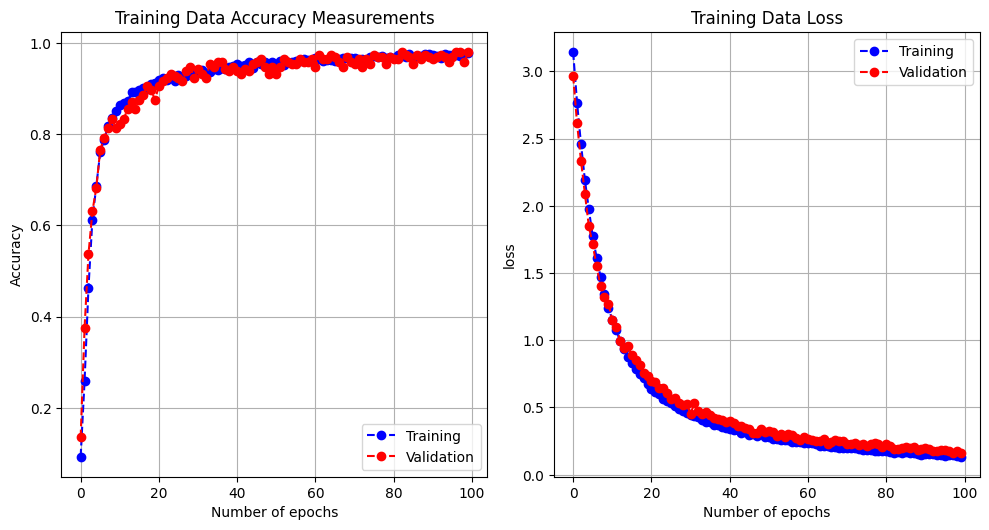

time: 532 ms (started: 2023-05-22 20:21:38 +00:00)


In [ ]:
def accuracy_loss_plot (history):
    fig = plt.figure(figsize=(10,10))

    plt.subplot(221)
    plt.plot(history.history["accuracy"], 'bo--', label="Training")
    plt.plot(history.history['val_accuracy'], 'ro--', label="Validation")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.tight_layout()

    plt.subplot(222)
    plt.plot(history.history["loss"], "bo--", label="Training")
    plt.plot(history.history["val_loss"], "ro--", label = "Validation")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid()
    plt.legend()
    plt.tight_layout()

    plt.show()

accuracy_loss_plot(history)

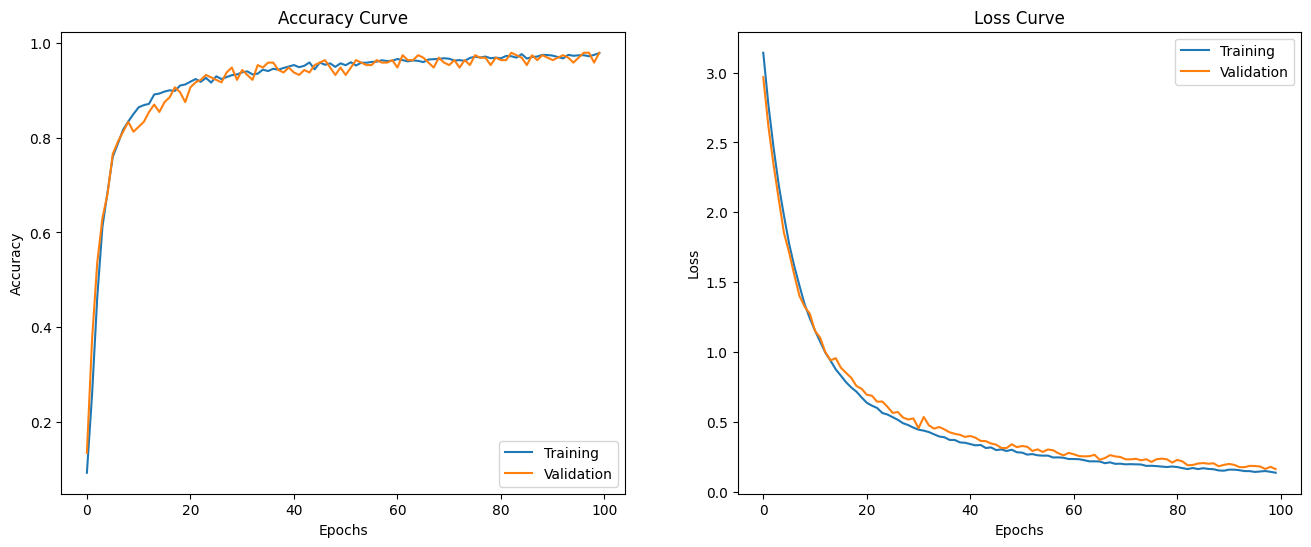

time: 413 ms (started: 2023-05-22 20:21:39 +00:00)


In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('Accuracy Curve')
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Loss Curve')
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Text(0.5, 1.0, 'Confusion Metrics')

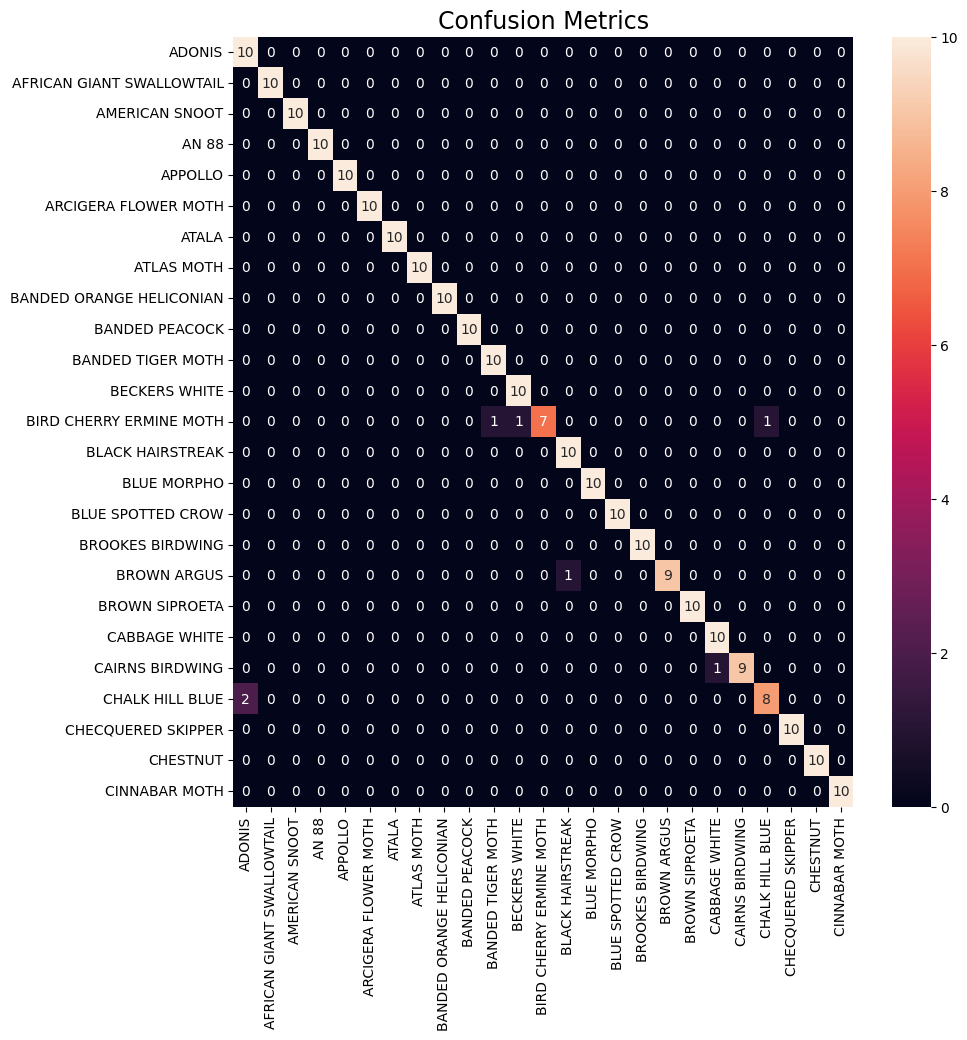

time: 2.06 s (started: 2023-05-22 20:21:39 +00:00)


In [ ]:
import seaborn as sns
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Metrics", fontsize=17)